### Importing libraries:

In [2]:
import numpy as np
import pandas as pd

### 1. Loading the csv file as a pandas dataframe 

In [4]:
batting = pd.read_csv('Batting.csv')
batting.head(n=5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


### 2. Print out the dimensions and info about the dataframe 

In [12]:
batting.shape

(102816, 25)

In [15]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

### 3. How many players have hit 40 or more HRs in one single season?

In [26]:
batting[batting['HR'] >= 40]['playerID'].nunique()

142

### 4. How many players have hit 600 or more HRs for their career? 

In [97]:
b1 = batting.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b1[b1['HR'] >= 600][['nameFirst', 'nameLast', 'HR']].reset_index(drop=True)

,nameFirst,nameLast,HR
0,Hank,Aaron,755
1,Barry,Bonds,762
2,Ken,Griffey,630
3,Willie,Mays,660
4,Alex,Rodriguez,696
5,Babe,Ruth,714
6,Sammy,Sosa,609
7,Jim,Thome,612


### 5. How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? 

In [103]:
b1 = batting.groupby(['playerID', 'yearID'], as_index = False).sum()
b1[(b1['2B'] >= 40) & (b1['3B'] >= 10) & (b1['H'] >= 200) & (b1['HR'] >= 30)]['playerID'].nunique()

11

### 6. How many players seasons have had 100 or more SBs? 

In [162]:
b1 = batting.groupby(['playerID', 'yearID', 'nameFirst', 'nameLast'], as_index = False).sum()
b1[b1['SB'] >= 100][['nameFirst','nameLast','yearID','SB']].sort_values(by='SB', ascending=False).reset_index(drop=True)

,nameFirst,nameLast,yearID,SB
0,Hugh,Nicol,1887,138.0
1,Rickey,Henderson,1982,130.0
2,Arlie,Latham,1887,129.0
3,Lou,Brock,1974,118.0
4,Charlie,Comiskey,1887,117.0
5,Billy,Hamilton,1889,111.0
6,John,Ward,1887,111.0
7,Billy,Hamilton,1891,111.0
8,Vince,Coleman,1985,110.0
9,Vince,Coleman,1987,109.0


### 7. How many players in the 1960s (yearID) have hit 200 or more HRs? 

In [132]:
b1 = batting[(batting['yearID'] >= 1960) & (batting['yearID'] < 1970)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2[(b2['HR'] >= 200)][['nameFirst','nameLast','HR']].sort_values(by='HR', ascending=False).reset_index(drop=True)

,nameFirst,nameLast,HR
0,Harmon,Killebrew,393
1,Hank,Aaron,375
2,Willie,Mays,350
3,Frank,Robinson,316
4,Willie,McCovey,300
5,Frank,Howard,288
6,Norm,Cash,278
7,Ernie,Banks,269
8,Mickey,Mantle,256
9,Orlando,Cepeda,254


### 8. Who has hit the most HRs in history? 

In [144]:
b1 = batting.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b1[b1['HR'] == b1['HR'].max()][['nameFirst','nameLast','HR']].reset_index(drop=True)

,nameFirst,nameLast,HR
0,Barry,Bonds,762


### 9. Who had the most hits (H) in the 1970s? 

In [148]:
b1 = batting[(batting['yearID'] >= 1970) & (batting['yearID'] < 1980)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2[b2['H'] == b2['H'].max()][['nameFirst','nameLast','H']].reset_index(drop=True)

,nameFirst,nameLast,H
0,Pete,Rose,2045


### 10. Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  

In [166]:
b1 = batting[(batting['yearID'] == 1977)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2['PA'] = b2['AB'] + b2['BB'] + b2['HBP'] + b2['SF']
b3 = b2[(b2['PA'] >= 500)].reset_index(drop=True)
b3['OBP'] = (b3['H'] + b3['BB'] + b3['HBP']) /  b3['PA']
b3[['nameFirst','nameLast','OBP']].sort_values(by='OBP', ascending=False).head(5).reset_index(drop=True)

,nameFirst,nameLast,OBP
0,Rod,Carew,0.448773
1,Ken,Singleton,0.437788
2,Reggie,Smith,0.426910
3,Mike,Hargrove,0.420312
4,Joe,Morgan,0.417054


###### Note:
######     The following are calculated as follows:
######         PA = AB + BB + HBP + SF
 ######        OBP = (H + BB + HBP) / PA

### 11. Top 8 highest averages in 2013 with at least 300 PAs?

In [165]:
b1 = batting[(batting['yearID'] == 2013)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2['PA'] = b2['AB'] + b2['BB'] + b2['HBP'] + b2['SF']
b3 = b2[(b2['PA'] >= 300)].reset_index(drop=True)
b3['HA'] = b3['H'] /  b3['AB']
b3[['nameFirst','nameLast','HA']].sort_values(by='HA', ascending=False).head(8).reset_index(drop=True)

,nameFirst,nameLast,HA
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


###### Note:
###### The following are calculated as follows:
###### PA = AB + BB + HBP + SF
###### HA = H / AB

### 12. Leaders in hits from 1940 up to and including 1949.

In [211]:
b1 = batting[(batting['yearID'] >= 1940) & (batting['yearID'] < 1950)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2[['nameFirst','nameLast','H']].sort_values(by='H', ascending=False).head(5).reset_index(drop=True)

,nameFirst,nameLast,H
0,Lou,Boudreau,1578
1,Bob,Elliott,1563
2,Dixie,Walker,1512
3,Stan,Musial,1432
4,Bobby,Doerr,1407


### 13. Who led MLB with the most hits the most times?  And how many times?  

In [250]:
b1 = batting.groupby(['playerID', 'yearID','nameFirst', 'nameLast'], as_index = False).sum()
b2 = b1.groupby(['yearID'], as_index = False)['H'].max()
b3 = pd.merge(b1,b2,how='inner',on=['yearID','H']).copy()
b4 = b3.groupby(['playerID'], as_index = False)['yearID'].count().rename(columns={'yearID':'most_hits'})
b4.sort_values(by='most_hits', ascending=False)
b5 = b4[b4['most_hits'] == (b4['most_hits'].max())]
b5.reset_index(drop=True)
b6 = b1.groupby(['playerID','nameFirst', 'nameLast'], as_index = False).sum()
b7 = pd.merge(b5,b6,how='inner',on='playerID')
b7[['nameFirst','nameLast','most_hits','H']]
#print()

,nameFirst,nameLast,most_hits,H
0,Ty,Cobb,7,4189
1,Pete,Rose,7,4256
2,Ichiro,Suzuki,7,3030


### 14. Which players have played the most games for their careers?  

In [254]:
b1 = batting.groupby(['playerID','nameFirst', 'nameLast'], as_index = False).sum()
b1[['nameFirst','nameLast', 'G']].sort_values(by='G', ascending=False).head(5).reset_index(drop = True)

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


### 15. How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  

In [259]:
b1 = batting.groupby(['playerID','nameFirst', 'nameLast'], as_index = False).sum()
b1[(b1['H'] >= 3000) & (b1['HR'] >= 500)]['playerID'].count()

5

### 16. How many HRs were hit during the entire 1988 season?  

In [262]:
b1 = batting.groupby(['yearID'], as_index = False).sum()
b1[(b1['yearID'] == 1988)]['HR'].item()

3180

### 17. Please filter out and show the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.

In [273]:
b1 = batting[(batting['nameFirst'] == 'Wade') & (batting['nameLast'] == 'Boggs')]
b2 = b1[b1['AB'] >= 500].copy()
b2['Average'] = b2['H'] / b2['AB']
b2[['nameFirst','nameLast','Average']].sort_values(by='Average', ascending=False).head(3).reset_index(drop = True)

,nameFirst,nameLast,Average
0,Wade,Boggs,0.367534
1,Wade,Boggs,0.366438
2,Wade,Boggs,0.362976


### 18. Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.

In [274]:
b1 = batting[(batting['yearID'] == 1995)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2['PA'] = b2['AB'] + b2['BB'] + b2['HBP'] + b2['SF']
b3 = b2[(b2['PA'] >= 400)].reset_index(drop=True)
b3['OBP'] = (b3['H'] + b3['BB'] + b3['HBP']) /  b3['PA']
b3[['nameFirst','nameLast','OBP']].sort_values(by='OBP', ascending=False).head(10).reset_index(drop=True)

,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.478873
1,Frank,Thomas,0.454405
2,Mark,McGwire,0.440758
3,Jim,Thome,0.438061
4,Barry,Bonds,0.431496
5,Tim,Salmon,0.429467
6,Chili,Davis,0.429119
7,Dave,Magadan,0.427553
8,Chuck,Knoblauch,0.424483
9,Tim,Naehring,0.414729


### 19. Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?

In [280]:
b1 = batting[(batting['yearID'] == 1922) | (batting['yearID'] == 1925) | (batting['yearID'] == 1926) | (batting['yearID'] == 1928)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2[b2['3B'] == (b2['3B'].max())][['nameFirst', 'nameLast','3B']].reset_index(drop=True)

,nameFirst,nameLast,3B
0,Curt,Walker,59


### 20. How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  

In [287]:
b1 = batting.groupby(['playerID', 'yearID','nameFirst', 'nameLast'], as_index = False).sum()
b1[(b1['HR'] >= 30) & (b1['SB'] >= 30)]['playerID'].nunique()

38

### 21. Who had the highest OBP is 1986 with 400 or more ABs? 

In [288]:
b1 = batting[(batting['yearID'] == 1986)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2['PA'] = b2['AB'] + b2['BB'] + b2['HBP'] + b2['SF']
b3 = b2[(b2['AB'] >= 400)].reset_index(drop=True)
b3['OBP'] = (b3['H'] + b3['BB'] + b3['HBP']) /  b3['PA']
b3[['nameFirst','nameLast','OBP']].sort_values(by='OBP', ascending=False).head(1).reset_index(drop=True)

,nameFirst,nameLast,OBP
0,Wade,Boggs,0.45283


### 22. Same question but for 1997 and only in the NL (check league ID)? 

In [293]:
b1 = batting[(batting['yearID'] == 1997) & (batting['lgID'] == 'NL')].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
b2['PA'] = b2['AB'] + b2['BB'] + b2['HBP'] + b2['SF']
b3 = b2[(b2['AB'] >= 400)].reset_index(drop=True)
b3['OBP'] = (b3['H'] + b3['BB'] + b3['HBP']) /  b3['PA']
b3[['nameFirst','nameLast','OBP']].sort_values(by='OBP', ascending=False).head(1).reset_index(drop=True)

,nameFirst,nameLast,OBP
0,Larry,Walker,0.451807


### 23. Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)?

In [379]:
b1 = batting[(batting['yearID'] == 2012)].reset_index(drop=True)
b2 = b1.groupby(['playerID', 'nameFirst', 'nameLast', 'lgID'], as_index = False).sum()
b3 = b2[(b2['AB'] >= 500)]
b4 = b3.groupby(['lgID'], as_index = False).mean().rename(columns={'HR':'mean_HR'}).reset_index()
b5 = pd.merge (b3, b4, on='lgID', how='left')
b5[(b5['HR']) > (b5['mean_HR'])][['nameFirst','nameLast','HR']].sort_values(by='HR', ascending = False).reset_index(drop=True)

,nameFirst,nameLast,HR
0,Miguel,Cabrera,44
1,Josh,Hamilton,43
2,Curtis,Granderson,43
3,Edwin,Encarnacion,42
4,Ryan,Braun,41
5,Adam,Dunn,41
6,Adrian,Beltre,36
7,Josh,Willingham,35
8,Jay,Bruce,34
9,Adam,LaRoche,33


### 24. Who is the youngest player to hit 50 or more HRs in a single season?

In [345]:
b1 = batting.groupby(['playerID', 'yearID', 'nameFirst', 'nameLast', 'birthYear'], as_index = False).sum()
b2 = b1[(b1['HR'] >= 50)].copy()
b2['age'] = b2['yearID'] - b2['birthYear']
b2[['nameFirst','nameLast','HR', 'age']].sort_values(by='age').head(1).reset_index(drop=True)

,nameFirst,nameLast,HR,age
0,Prince,Fielder,50,23


### 25. Who are the five youngest players to hit 300 or more HRs for their career? 

In [359]:
b1 = batting.groupby(['playerID', 'yearID', 'nameFirst', 'nameLast', 'birthYear']).sum().groupby(level=0).cumsum().reset_index()
b2 = b1[(b1['HR'] >= 300)].copy()
b2['age'] = b2['yearID'] - b2['birthYear']
b2[['nameFirst','nameLast','yearID','HR', 'age']].sort_values(by='age').head(5).reset_index(drop=True)

,nameFirst,nameLast,yearID,HR,age
0,Andruw,Jones,2005,301,28
1,Albert,Pujols,2008,319,28
2,Mel,Ott,1937,306,28
3,Alex,Rodriguez,2003,345,28
4,Jimmie,Foxx,1935,302,28


### Bonus question 1: Graph total HRs per season using bar graph

In [380]:
import matplotlib
import matplotlib.pyplot as plt

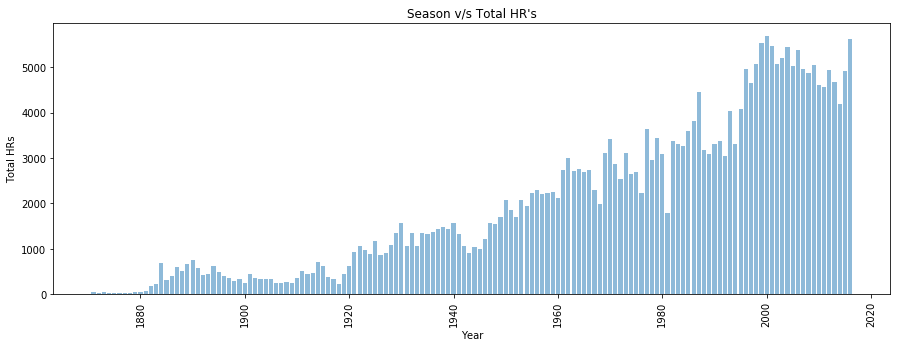

In [381]:
b1 = batting.groupby('yearID', as_index = False).sum()
plt.figure(figsize = (15, 5))

plt.bar(b1['yearID'], b1['HR'], align='center', alpha=0.5)

plt.xticks(rotation='vertical')

plt.ylabel('Total HRs')
plt.xlabel('Year')

plt.title("Season v/s Total HR's")
 
plt.show()

### Bonus question 2: A line graph for the average HRs per AB per season

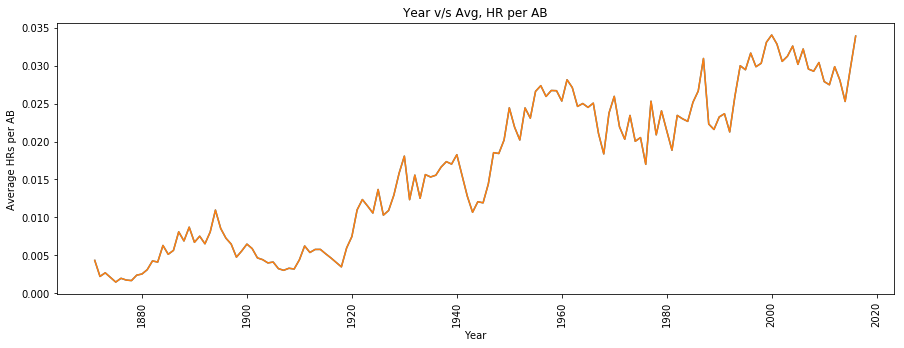

In [382]:
b1 = df.groupby('yearID', as_index = False).mean()[['yearID', 'HR']]
b2 = df.groupby('yearID', as_index = False).mean()[['yearID', 'AB']]

b3 = pd.concat([b1, b2], axis=1)
b3['avg'] = b3['HR'] / b3['AB']

plt.figure(figsize = (15, 5))
plt.plot(b3['yearID'], b3['avg'])
plt.xticks(rotation='vertical')
plt.ylabel('Average HRs per AB')
plt.xlabel('Year')
plt.title('Year v/s Avg, HR per AB')
 
plt.show()